<a href="https://colab.research.google.com/github/zurriyatafatni/Image_Lungs_COVID-19_PredicitionDeepLearning/blob/main/challange2_2_CT_Image_Lungs_COVID_19_Predicition_Deep_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
base_dir = '/content/drive/My Drive/lungscan/preprocess/Scan'
dir = ['CT_COVID','CT_NonCOVID']
for i in dir:
  print(len(os.listdir(base_dir+'/'+ i)))
# print(os.listdir('/tmp/rockpaperscissors'))

349
397


In [ ]:
dir2 = ['training','testing']
try:
    os.mkdir(base_dir+'/images')
    for x in dir2:
      os.mkdir(base_dir+'/images/'+x)
      for i in dir:
        os.mkdir(base_dir+'/images/'+x+'/'+i)

except OSError:
    pass

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")
 
    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]
 
    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)
 
    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)
 
 
COVID_SOURCE_DIR = base_dir+"/CT_COVID/"
TRAINING_COVID_DIR = base_dir+"/images/training/CT_COVID/"
TESTING_COVID_DIR = base_dir+"/images/testing/CT_COVID/"
NONCOVID_SOURCE_DIR = base_dir+"/CT_NonCOVID/"
TRAINING_NONCOVID_DIR = base_dir+"/images/training/CT_NonCOVID/"
TESTING_NONCOVID_DIR = base_dir+"/images/testing/CT_NonCOVID/"

split_size = .9
split_data(COVID_SOURCE_DIR, TRAINING_COVID_DIR, TESTING_COVID_DIR, split_size)
split_data(NONCOVID_SOURCE_DIR, TRAINING_NONCOVID_DIR, TESTING_NONCOVID_DIR, split_size)


In [ ]:
print('Jumlah Data training dan testing COVID dan NONCOVID')

print('Data Training COVID = ',len(os.listdir(base_dir+'/images/training/CT_COVID/')))
print('Data Testing COVID = ',len(os.listdir(base_dir+'/images/testing/CT_COVID/')))

print('Data Training NONCOVID = ',len(os.listdir(base_dir+'/images/training/CT_NonCOVID/')))
print('Data Testing NONCOVID = ',len(os.listdir(base_dir+'/images/testing/CT_NonCOVID/')))


Jumlah Data training dan testing COVID dan NONCOVID
Data Training COVID =  345
Data Testing COVID =  69
Data Training NONCOVID =  390
Data Testing NONCOVID =  76


In [ ]:
base = base_dir +'/images'
training_dir = os.path.join(base, 'training')
testing_dir = os.path.join(base, 'testing')

In [ ]:
os.listdir(base+'/training')

['CT_COVID', 'CT_NonCOVID']

In [ ]:
os.listdir(base+'/testing')

['CT_COVID', 'CT_NonCOVID']

In [ ]:
#direktori data training
train_covid_dir = os.path.join(training_dir, 'CT_COVID')
train_noncovid_dir = os.path.join(training_dir, 'CT_NonCOVID')

#direktori data testing
test_covid_dir = os.path.join(testing_dir, 'CT_COVID')
test_noncovid_dir = os.path.join(testing_dir, 'CT_NonCOVID')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        training_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi lebih dari 2 kelas maka menggunakan class_mode = 'categorical'
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        testing_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, 
        class_mode='binary')

Found 735 images belonging to 2 classes.
Found 145 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=30,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=10,
      validation_data=test_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=20,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/10
30/30 - 9s - loss: 0.5089 - accuracy: 0.7083 - val_loss: 0.5290 - val_accuracy: 0.7625
Epoch 2/10
30/30 - 9s - loss: 0.6085 - accuracy: 0.6083 - val_loss: 0.5889 - val_accuracy: 0.6875
Epoch 3/10
30/30 - 9s - loss: 0.5631 - accuracy: 0.7250 - val_loss: 0.5358 - val_accuracy: 0.7500
Epoch 4/10
30/30 - 9s - loss: 0.5695 - accuracy: 0.6750 - val_loss: 0.4981 - val_accuracy: 0.8000
Epoch 5/10
30/30 - 9s - loss: 0.5863 - accuracy: 0.6833 - val_loss: 0.5778 - val_accuracy: 0.6750
Epoch 6/10
30/30 - 9s - loss: 0.6654 - accuracy: 0.6417 - val_loss: 0.5335 - val_accuracy: 0.6750
Epoch 7/10
30/30 - 9s - loss: 0.5283 - accuracy: 0.7167 - val_loss: 0.5283 - val_accuracy: 0.7250
Epoch 8/10
30/30 - 9s - loss: 0.5384 - accuracy: 0.6723 - val_loss: 0.5077 - val_accuracy: 0.7375
Epoch 9/10
30/30 - 9s - loss: 0.5176 - accuracy: 0.7417 - val_loss: 0.5181 - val_accuracy: 0.7500
Epoch 10/10
30/30 - 9s - loss: 0.5039 - accuracy: 0.7647 - val_loss: 0.4590 - val_accuracy: 0.8125


Saving covid70.jpg to covid70.jpg
COVID


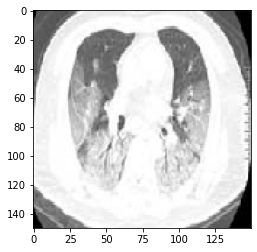

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  # print(classes)
  if classes==0:
    print('COVID')
  else:
    print('Non COVID')